## Comparing the clean and incremental build time of a system on its different configurations

In [1]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,62.04,9648880,27.44,12.80,0.01
1,00002,66.12,10173424,28.22,14.25,0.01
2,00003,69.24,9699272,33.87,16.60,0.01
3,00004,69.66,10199640,33.65,16.35,0.01
4,00005,69.45,10147616,30.91,15.87,0.01
5,00006,73.30,10201208,75.46,47.58,0.01
6,00007,58.01,8464736,28.19,13.33,0.01
7,00008,59.86,8528944,28.50,14.15,0.01
8,00009,72.94,10190120,39.86,18.10,0.01
9,00010,71.89,10106296,37.42,17.66,0.01


In [2]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
10,00011,68.57,0.01,99.99
8,00009,72.94,0.01,99.99
18,00019,73.05,0.01,99.99
13,00014,71.46,0.01,99.99
9,00010,71.89,0.01,99.99
19,00020,71.88,0.01,99.99
5,00006,73.30,0.01,99.99
2,00003,69.24,0.01,99.99
6,00007,58.01,0.01,99.98
7,00008,59.86,0.01,99.98


In [3]:
# Extracting only the first and last 5 extreme differences in build time
df5 = df4[: 5]
df6 = df4[-5:]
df7 = df5.append(df6)
df7

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
10,00011,68.57,0.01,99.99
8,00009,72.94,0.01,99.99
18,00019,73.05,0.01,99.99
13,00014,71.46,0.01,99.99
9,00010,71.89,0.01,99.99
14,00015,63.02,0.01,99.98
15,00016,66.86,0.01,99.98
16,00017,68.71,0.01,99.98
17,00018,59.67,0.01,99.98
0,00001,62.04,0.01,99.98


<AxesSubplot:xlabel='Configurations', ylabel='Diff. of build time [%]'>

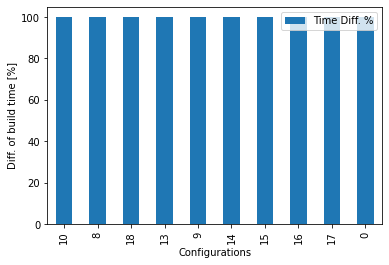

In [4]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = df4[["Branch", "Time Diff. %"]].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Diff. of build time [%]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot